<h1>Wheat_Impurities_Detection using Convolutional Neural Network.</h1>

## *Problem Statement*:
This model diffrentiates between Healthy Wheat, Leaf Rust, Stem Rust and Wild Oat using our collected <a href="https://www.kaggle.com/abanoublamie/wild-oats"> Wild Oat Dataset</a>, Global wheat detection <a href=""> Healthy Wheat Dataset</a> and <a href="https://www.kaggle.com/shadabhussain/cgiar-computer-vision-for-crop-disease1">Wheat Rust Dataset</a>.

## *Authors*:
<ul>
    <li>Nour Bahaa</li>
    <li>Mai Mahmoud</li>
    <li>Ibrahim Fawzy</li>
    <li>Abanoub George</li>
</ul>

## *Supervisors*:
<ul>
    <li>Prof. Khaled Hussien</li>
    <li>Eng. Hager Sobeah</li>
    <li>Eng. Nour el-huda Ashraf</li>
</ul>



### Importing the main libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
train_images = '/media/abanoublamie/5E76093A76091485/ssss/yolov5/wheat_rust/images/train'
train_labels = '/media/abanoublamie/5E76093A76091485/ssss/yolov5/wheat_rust/labels/train'
test_images = '/media/abanoublamie/5E76093A76091485/ssss/yolov5/wheat_rust/images/validation'
test_labels = '/media/abanoublamie/5E76093A76091485/ssss/yolov5/wheat_rust/labels/validation'

### Pre-processing on the Trainning set (*Image Augmentation*)
We are applying some geometerical tranformation to move the pixels to prevent overfitting of the model (Zoom In, Zoom Out, Rotations). 

In [3]:
train_datagenarator = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

trainning_set = train_datagenarator.flow_from_directory(train_images,
                                                         target_size = (64, 64),
                                                         batch_size = 15)

Found 752 images belonging to 4 classes.


### Pre-processing on the Test set

In [4]:
test_datagenarator = ImageDataGenerator(rescale = 1./255)
test_set = test_datagenarator.flow_from_directory(test_images,
                                                   target_size = (64, 64),
                                                   batch_size = 5)

Found 321 images belonging to 4 classes.


### CNN init
Intiating Our Convolutional Neural Network

In [5]:
cnn = tf.keras.models.Sequential()

###  Convolution Layer
Feature Mapping (Applying filters), the activation function(ReLu) is responsible for performance enhancement because, it will output if positive, otherwise, it will output zero 

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64, 64, 3]))

###  Pooling Layer (Max Pooling)
Detect the features in any postition, background, light, texture and pattern

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

###  Dropout Layer
Prevents the model from overfitting

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

### Adding a second convolutional layer & poolin layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,      # Kernal Size is the width and height of the 2D convolution window.

                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening
Rotate the matrix to a column matrix for future use of the ANN

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection
Matching the features with the classes to make a prediction. (units= Hidden Neurons)

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

###  Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=4, activation='sigmoid'))

### Compiling the CNN
We used Adam Optimizer to update network weights iterative based in training data.

In [13]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='Adam',
            metrics =['accuracy'])

### CNN Summary

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

### Trainning the CNN on the Trainning set and evaluating it on the Test set

In [15]:
history = cnn.fit(x = trainning_set,
                  validation_data = test_set,
                  epochs = 20)

Train for 51 steps, validate for 65 steps
Epoch 1/20
51/51 [==============================] - 119s 2s/step - loss: 0.9130 - accuracy: 0.6170 - val_loss: 0.7930 - val_accuracy: 0.6947
Epoch 2/20
51/51 [==============================] - 102s 2s/step - loss: 0.7255 - accuracy: 0.7088 - val_loss: 0.6944 - val_accuracy: 0.6978
Epoch 3/20
51/51 [==============================] - 105s 2s/step - loss: 0.5851 - accuracy: 0.7553 - val_loss: 0.6254 - val_accuracy: 0.7445
Epoch 4/20
51/51 [==============================] - 104s 2s/step - loss: 0.5207 - accuracy: 0.7992 - val_loss: 0.6451 - val_accuracy: 0.7570
Epoch 5/20
51/51 [==============================] - 104s 2s/step - loss: 0.4500 - accuracy: 0.8218 - val_loss: 0.7625 - val_accuracy: 0.7601
Epoch 6/20
51/51 [==============================] - 99s 2s/step - loss: 0.4229 - accuracy: 0.8311 - val_loss: 0.5329 - val_accuracy: 0.8100
Epoch 7/20
51/51 [==============================] - 103s 2s/step - loss: 0.4036 - accuracy: 0.8338 - val_loss: 0.

### Getting the Average accuracy among all the stages (epochs)

In [16]:
Avg_Acc = np.mean(history.history['accuracy'])
print("The Average Accuracy : ", round(Avg_Acc * 100, 2),' %')

The Average Accuracy :  84.71  %


### Plotting the Accuracy among all the epochs

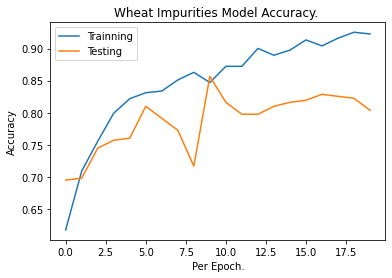

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Wheat Impurities Model Accuracy. ')
plt.xlabel('Per Epoch.')
plt.ylabel('Accuracy')
plt.legend(['Trainning', 'Testing'], loc='upper left')
plt.show()

In [18]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_images, # Put your path here
    target_size=(64, 64),
    batch_size=15,
    shuffle=False)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  
print(class_labels)

Found 321 images belonging to 4 classes.
['Healthy Wheat', 'Leaf Rust', 'Stem Rust', 'Wild Oat']


<center><b>End of Notebook.</b></center>